<a href="https://colab.research.google.com/github/tarun1208/BasicML/blob/main/Blog_Post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
#Reading or loading data
df = pd.read_csv('/content/drive/MyDrive/amazon_delivery.csv')
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [ ]:
df.dropna(inplace=True)

# Convert df types
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time']).dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time']).dt.time


In [ ]:
# Create a new feature for distance
df['Distance'] = df.apply(lambda row: geodesic((row['Store_Latitude'], row['Store_Longitude']),
                                                   (row['Drop_Latitude'], row['Drop_Longitude'])).km, axis=1)

df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.488112
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,10.983242
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.648024
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.219668


In [ ]:
# Extract day of the week and hour from Order_Date
df['Order_Day'] = df['Order_Date'].dt.dayofweek
df['Order_Hour'] = df['Order_Date'].dt.hour
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_Day,Order_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737,5,0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737,4,0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693,5,0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497,1,0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.488112,3,0
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,10.983242,2,0
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.648024,4,0
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.219668,0,0


In [ ]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_Day,Order_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737,5,0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737,4,0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693,5,0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497,1,0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898,5,0


# Exploratory Data Analysis (EDA)

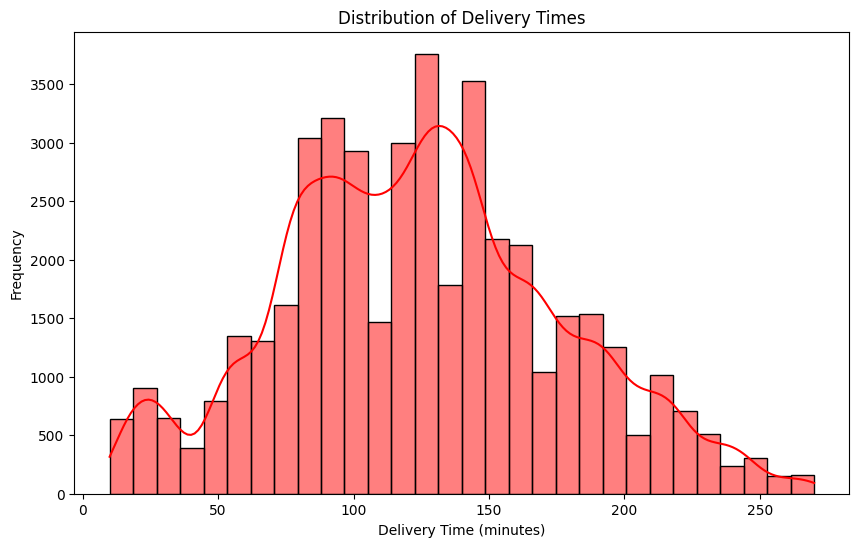

In [ ]:
#Distribution of Delivery Times
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True,color='red')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

**Scatter Plot**

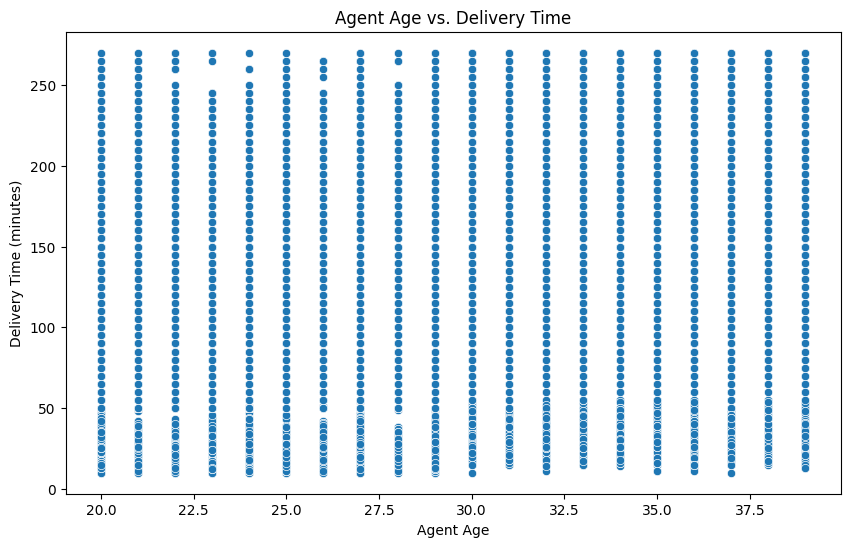

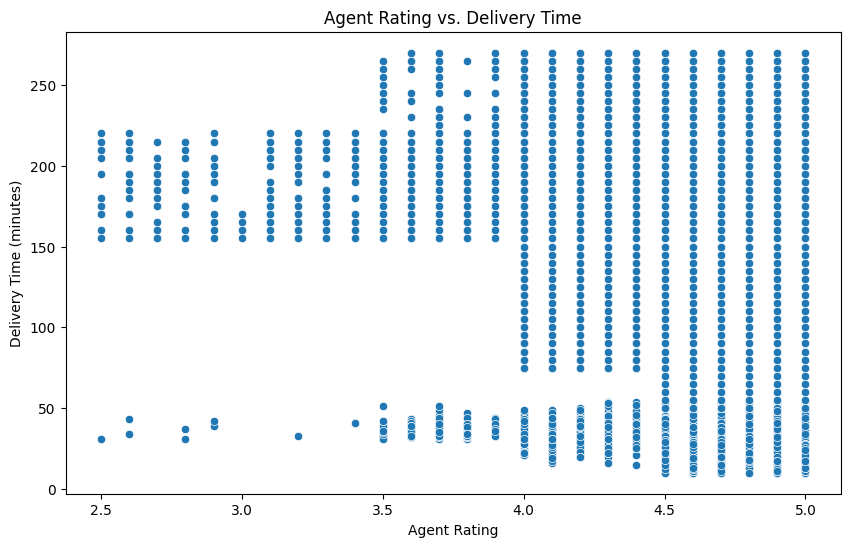

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Agent_Age', y='Delivery_Time', data=df)
plt.title('Agent Age vs. Delivery Time')
plt.xlabel('Agent Age')
plt.ylabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df)
plt.title('Agent Rating vs. Delivery Time')
plt.xlabel('Agent Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

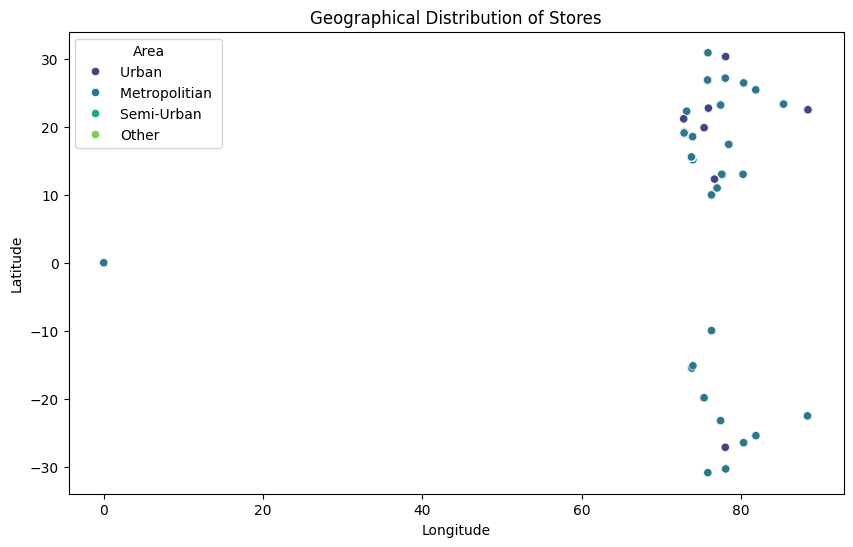

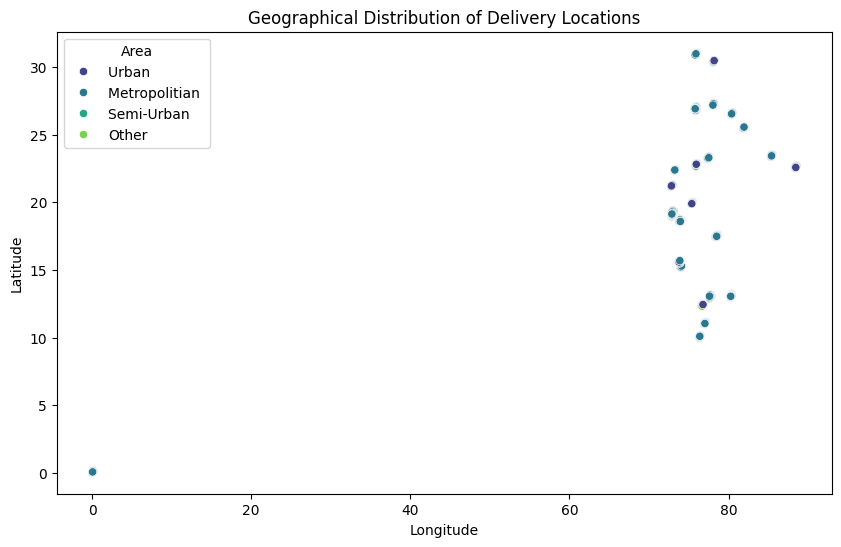

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Longitude', y='Store_Latitude', hue='Area', data=df, palette='viridis')
plt.title('Geographical Distribution of Stores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Drop_Longitude', y='Drop_Latitude', hue='Area', data=df, palette='viridis')
plt.title('Geographical Distribution of Delivery Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Temporal Analysis**

Analyzing delivery times across different days of the week and hours of the day.

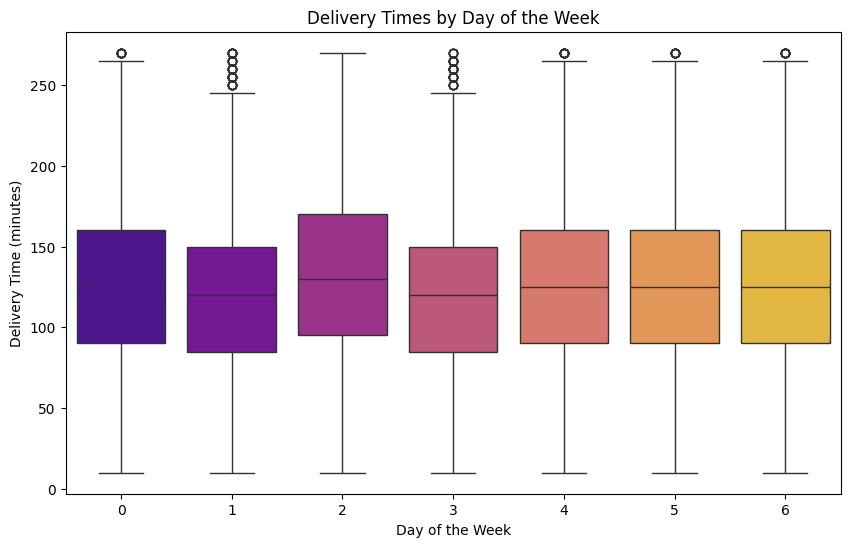

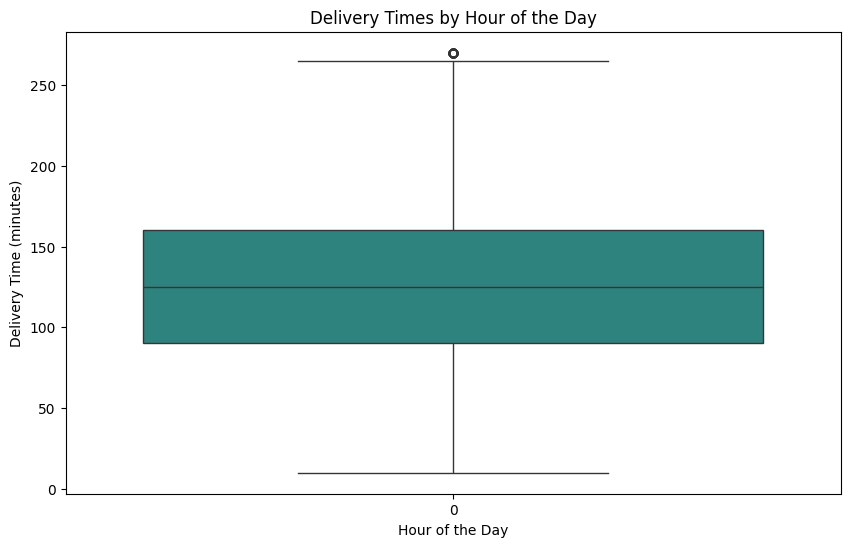

In [ ]:
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Day', y='Delivery_Time',palette='plasma', data=df)
plt.title('Delivery Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Hour', y='Delivery_Time', palette='viridis', data=df)
plt.title('Delivery Times by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()

**Impact of External Factors**

Examining the influence of weather and traffic conditions on delivery times.

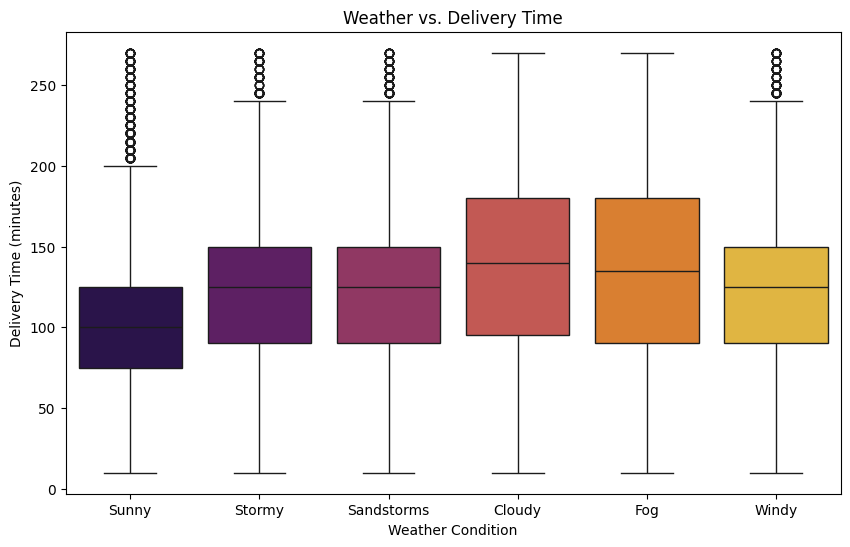

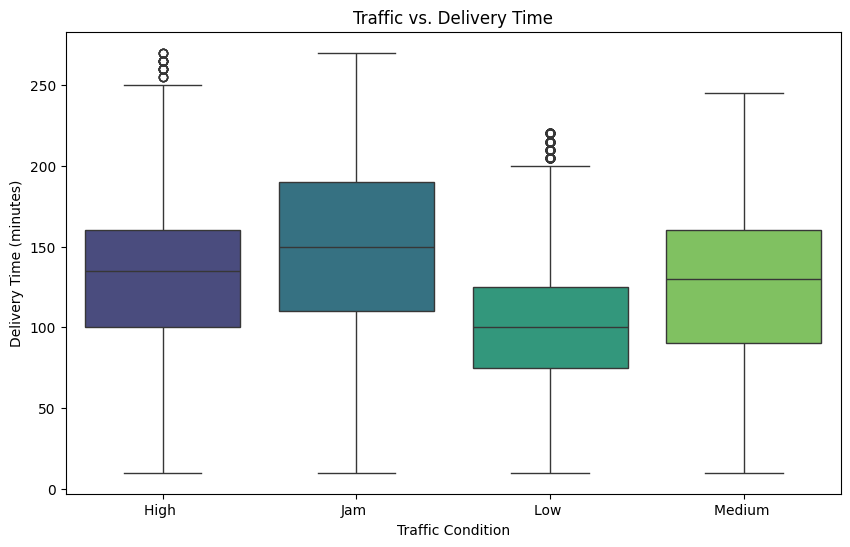

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time',palette='inferno', data=df)
plt.title('Weather vs. Delivery Time')
plt.xlabel('Weather Condition')
plt.ylabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic', y='Delivery_Time',palette='viridis', data=df)
plt.title('Traffic vs. Delivery Time')
plt.xlabel('Traffic Condition')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Correlation Heat Map

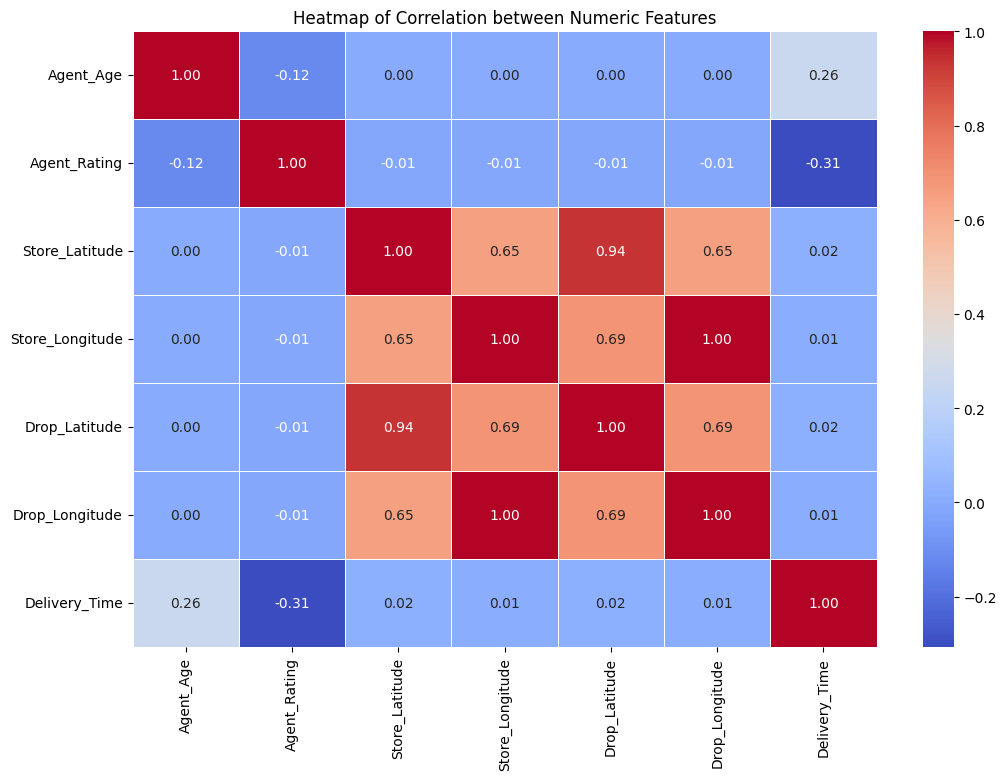

In [ ]:
numeric_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
                    'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation between Numeric Features')
plt.show()

**Histogram**

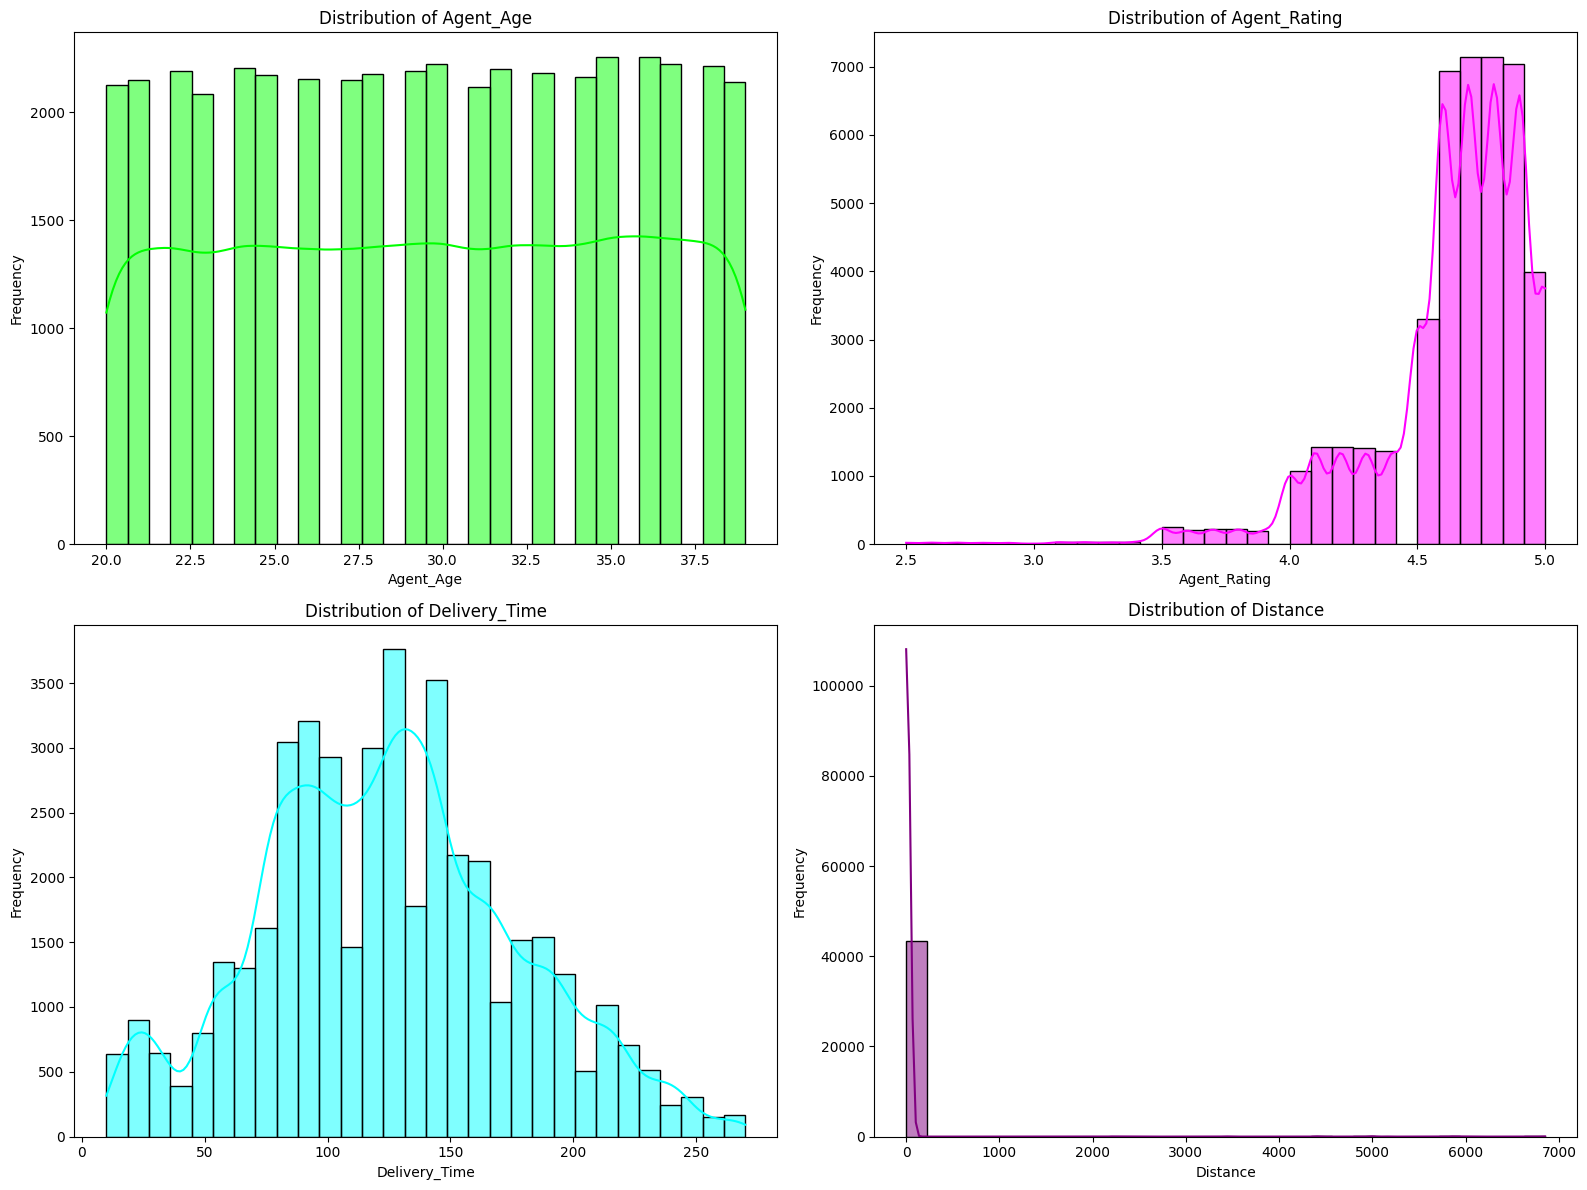

In [ ]:
features = ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Distance']

#ploting histogram for each feature
plt.figure(figsize=(16, 12))
colors= ['lime', 'magenta', 'cyan', 'purple']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, color=colors[i-1],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Line Plot**

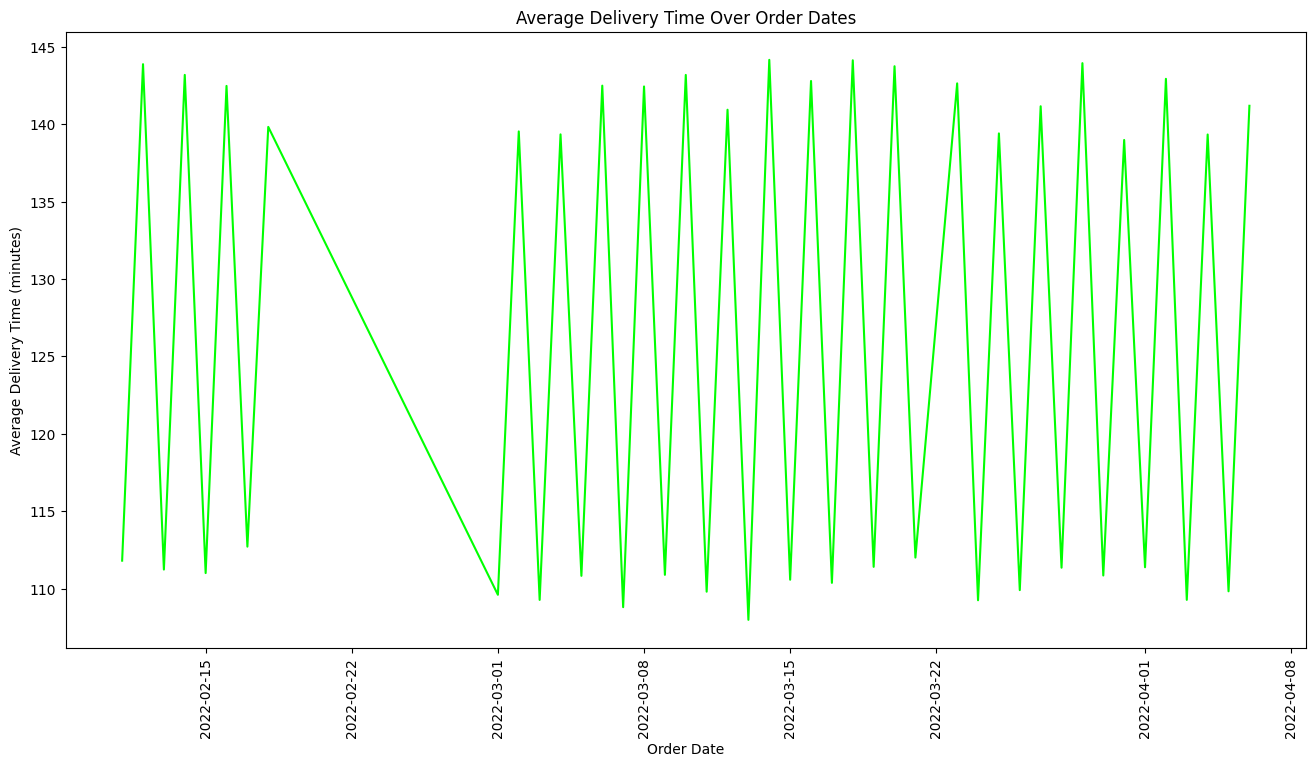

In [ ]:
daily_delivery_time = df.groupby('Order_Date')['Delivery_Time'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(data=daily_delivery_time, x='Order_Date', y='Delivery_Time',color='lime')
plt.title('Average Delivery Time Over Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=90)
plt.show()

**violinplot**

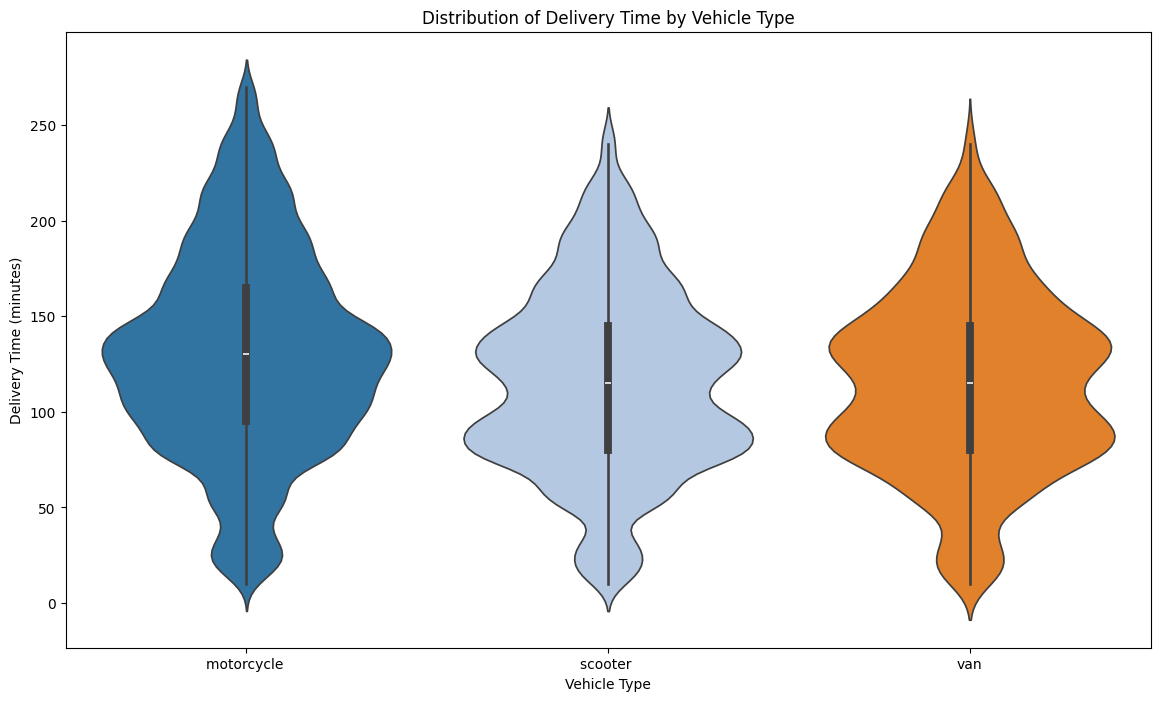

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Vehicle', y='Delivery_Time', palette='tab20')
plt.title('Distribution of Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (minutes)')
plt.show()

**Donut plot**

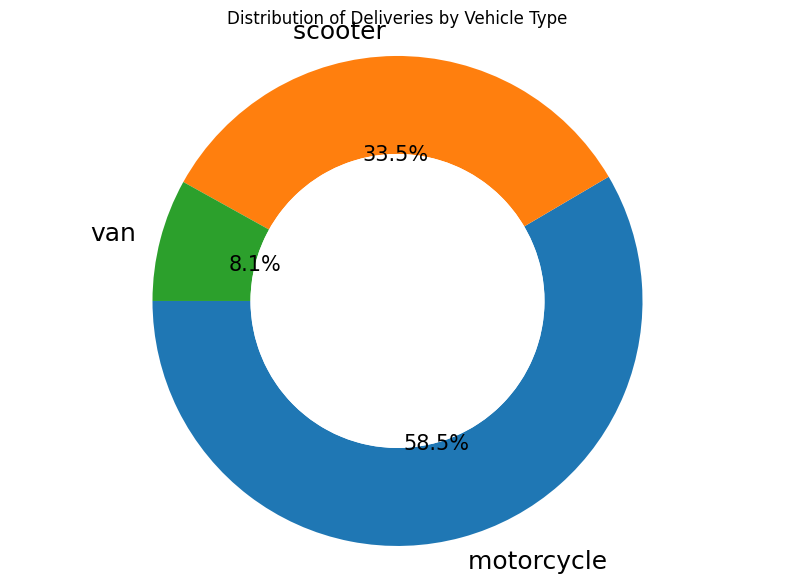

In [ ]:
plt.figure(figsize=(10, 7))
vehicle_counts = df['Vehicle'].value_counts()

#pie chart
wedges, texts, autotexts = plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%',
                                   startangle=180, wedgeprops=dict(width=0.4))


centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_fontsize(18)
for autotext in autotexts:
    autotext.set_fontsize(15)

plt.title('Distribution of Deliveries by Vehicle Type')
plt.axis('equal')
plt.show()
